In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as SI
import scipy.optimize as SOP
from scipy.integrate import solve_ivp
plt.rcParams['font.size'] = 30
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (3,6)

L.H.O.

eigenvalue is  1.0000009413881346


Text(0.5, 1.0, 'Normalized ground state Wave function 1 D harmonic oscillator\n\n')

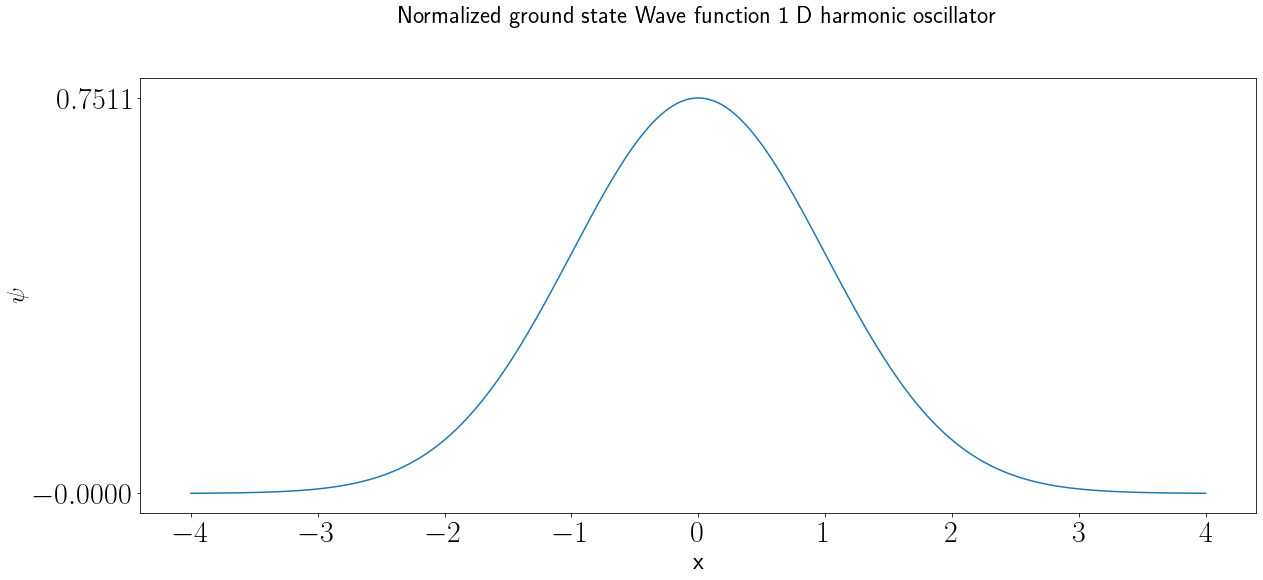

In [2]:
xmax=4 # higher higher excited states
#oe=1   # set -1 for odd
X=np.linspace(0,xmax,100)
PSI0=[1,0]

def f(PSI,x,e):   # function for Schr eqn
    psi, psid=PSI
    dpsi=psid
    dpsid=-(e-x**2)*psi
    return [dpsi, dpsid]

def schr(e):      # function for bisection
    P=SI.odeint(f,PSI0,X,args=(e,))
    shy =P[-1,0] # 
    return(shy)

ecr=SOP.bisect(schr,0.9,1.1) # set app  limits

print ('eigenvalue is ', ecr)

X1=np.linspace(0,xmax,500)
P=SI.odeint(f,PSI0, X1,args=(ecr,))
P2=np.flipud(P)                   #*oe
PT=np.vstack((P2[:-1],P))
si=PT[:,0]
X=np.linspace(-xmax,xmax,999)
N=1.0/SI.simps(si*si, X)
si*=np.sqrt(N)
simin, simax=min(si), max(si)
plt.figure(figsize=(20, 8))
plt.plot(X,si)
plt.rcParams.update({'font.size':20})
plt.xlabel('x',fontsize=25)
plt.yticks([simin,simax])
plt.ylabel(r'$\psi$',fontsize=25)
plt.title('Normalized ground state Wave function 1 D harmonic oscillator\n\n')

1. Use shooting method to solve particle in a box problem. Box is from 0 ≪ x ≪ a.  
   Find the ground, the first and the fourth excited state (n=5)

In [3]:
def bParticle(xmax,a,b,n):
    X=np.linspace(0,xmax,100)
    PSI0=[0,1]

    def f(PSI,x,e):# function for Schr eqn
        psi, psid=PSI
        dpsi=psid
        dpsid=-2*e*psi
        return [dpsi, dpsid]

    def schr(e): # function for bisection
        P=SI.odeint(f,PSI0,X,args=(e,))
        shy =P[-1,0] # 
        return(shy)
    
    ecr=SOP.bisect(schr,a,b) # set app  limits
    #print ('eigenvalue of state n = ',n,' is ', ecr)
    X1=np.linspace(0,xmax,500)
    P=SI.odeint(f,PSI0, X1,args=(ecr,))
    si=P[:,0]
    X=np.linspace(0,xmax,500)
    N=1.0/SI.simps(si*si, X)
    si*=np.sqrt(N)
    return n,X,si,ecr

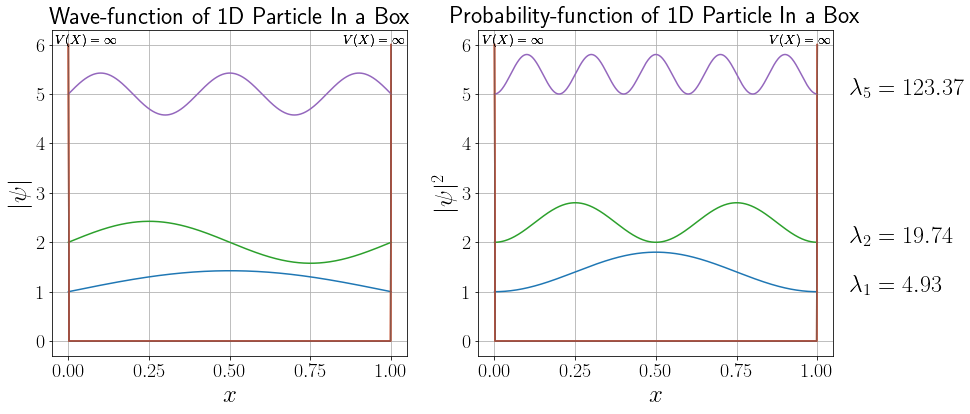

In [6]:
def V(x):
    v = np.ones(x.shape)*6
    for i, _x in enumerate(x):
        if ((_x > 0) & (_x < 1)) :
            v[i] = 0
    return v

xmax=1
a=[4.7,19.5,123.2]
b=[5.1,20.1,123.5]
n=[1,2,5]

fig,(a1,a2)=plt.subplots(1,2,figsize=(14,6))
for i in range(len(n)):
    n1,X,si,ecr=bParticle(xmax,a[i],b[i],n[i])
    a1.plot(X,0.3*si+n1)
    a1.set_xlabel(r'$x$',size=25)
    a1.grid()
    a1.set_ylabel(r'$|\psi|$',fontsize=25)
    a1.set_title('Wave-function of 1D Particle In a Box',fontsize=24)
    a1.plot(X,V(X))
    a1.text(-0.04,6,r'$V(X)=\infty$',fontsize=13)
    a1.text(0.85,6,r'$V(X)=\infty$',fontsize=13)
    a2.plot(X,0.4*si**2+n1)
    a2.set_xlabel(r'$x$',size=25)
    a2.grid()
    a2.set_ylabel(r'$|\psi|^2$',fontsize=25)
    a2.set_title('Probability-function of 1D Particle In a Box',fontsize=24)
    a2.plot(X,V(X))
    a2.text(1.1,n1,r'$\lambda_{}={:.2f}$'.format(n1,ecr),fontsize=24)
    a2.text(-0.04,6,r'$V(X)=\infty$',fontsize=13)
    a2.text(0.85,6,r'$V(X)=\infty$',fontsize=13)
plt.show()

for n = 1 ,energy:5.978702666044515e-38
for n = 2 ,energy:2.391481066417806e-37
for n = 5 ,energy:1.4946756665111288e-36


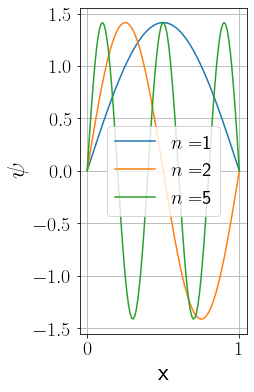

In [7]:
def plot_eigenfunction(m, hbar, L, n):
    x = np.linspace(0, L, 100)
    y = np.sqrt(2/L) * np.sin(n * np.pi * x/ L )
    plt.plot(x, y, label='$n=$%i'%n)
    plt.xlabel('x',size=25)
    plt.ylabel(r'$\psi$',fontsize=25)
    plt.legend()
    plt.grid()
    print('for n = ' + str(n),',energy:' +str((n**2 * np.pi** 2 * hbar**2 ) / (2 * m * L**2) ))
    return None

m = 9.1e-31          # mass of electron
hbar = 1.05e-34      # Planck's constrant
L = 1            # width of pur box
n = [1,2,5]
for i in range(len(n)):
    plot_eigenfunction(m, hbar, L, n[i])

2. Use shooting method to solve particle in a box problem. Box is from $−\frac{a}{2}≪ x ≪\frac{a}{2}$. 

   Find the ground the first and the fourth excited state (n=5). Use symmetry.

eigenvalue is  4.934802269931241


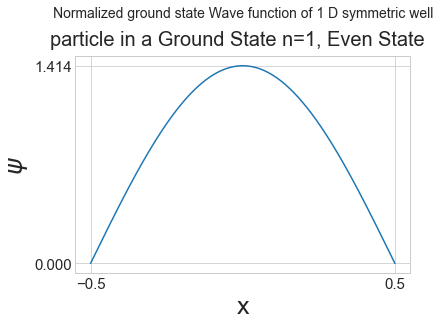

In [20]:
import scipy.integrate as SI
import scipy.optimize as SOP
import numpy as np
import matplotlib.pyplot as plt
xmax=0.5 # higher higher excited states
oe=1 # set -1 for odd
X=np.linspace(0,xmax,100)
PSI0=[1,0]       # ass for ground state psi=1 and dpsi=0 at x=0 ,Even

def f(PSI,x,e):# function for Schr eqn
    psi, psid=PSI
    dpsi=psid
    dpsid=-2*e*psi
    return [dpsi, dpsid]

def schr(e): # function for bisection
    P=SI.odeint(f,PSI0,X,args=(e,))
    shy =P[-1,0] # 
    return(shy)

ecr=SOP.bisect(schr,4.7,5.1) # set app  limits

print ('eigenvalue is ', ecr)


X1=np.linspace(0,xmax,500)
P=SI.odeint(f,PSI0, X1,args=(ecr,))
P2=oe*np.flipud(P)
PT=np.vstack((P2[:-1],P))
si=PT[:,0]
X=np.linspace(-xmax,xmax,999)
N=1.0/SI.simps(si*si, X)
si*=np.sqrt(N)
simin, simax=min(si), max(si)
plt.plot(X,si)

plt.xlabel('x',size=25)
plt.yticks([simin,simax],size=15)
plt.xticks([-xmax,xmax],size=15)
plt.ylabel(r'$\psi$',fontsize=25)
plt.suptitle('particle in a Ground State n=1, Even State',fontsize=20,y=0.97)
plt.title('Normalized ground state Wave function of 1 D symmetric well\n\n',fontsize=14)
plt.show()

eigenvalue is  19.739208766257434


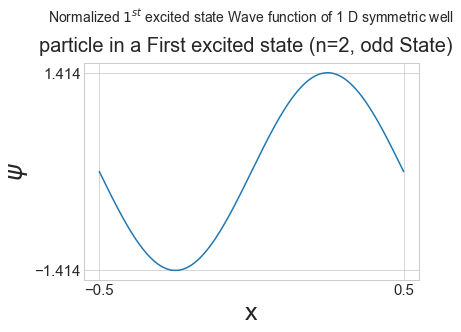

In [21]:
import scipy.integrate as SI
import scipy.optimize as SOP
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

xmax=0.5 # higher higher excited states
oe=-1 # set 1 for even
X=np.linspace(0,xmax,100)
PSI0=[0,1]       # ass for 1st excited state psi=0 and dpsi=1 at x=0 ,odd

def f(PSI,x,e):# function for Schr eqn
    psi, psid=PSI
    dpsi=psid
    dpsid=-2*e*psi
    return [dpsi, dpsid]

def schr(e): # function for bisection
    P=SI.odeint(f,PSI0,X,args=(e,))
    shy =P[-1,0] # 
    return(shy)

ecr=SOP.bisect(schr,19.5,20) # set app  limits

print ('eigenvalue is ', ecr)
#e=np.linspace(1,200,1000)

X1=np.linspace(0,xmax,500)
P=SI.odeint(f,PSI0, X1,args=(ecr,))
P2=oe*np.flipud(P)
PT=np.vstack((P2[:-1],P))
si=PT[:,0]
X=np.linspace(-xmax,xmax,999)
N=1.0/SI.simps(si*si, X)
si*=np.sqrt(N)
simin, simax=min(si), max(si)
plt.plot(X,si)
#plt.rcParams.update({'font.size':20})
plt.xlabel('x',size=25)
plt.yticks([simin,simax],size=15)
plt.xticks([-xmax,xmax],size=15)
plt.ylabel(r'$\psi$',fontsize=25)
plt.suptitle('particle in a First excited state (n=2, odd State)',fontsize=20,y=0.97)
plt.title('Normalized $1^{st}$ excited state Wave function of 1 D symmetric well\n\n',fontsize=14)
plt.show()

eigenvalue is  123.37005922825628


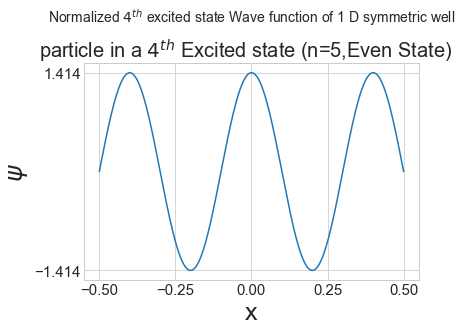

In [22]:
import scipy.integrate as SI
import scipy.optimize as SOP
import numpy as np
import matplotlib.pyplot as plt
xmax=0.5 # higher higher excited states
oe=1 # set -1 for odd state
X=np.linspace(0,xmax,100)
PSI0=[1,0]       # ass for 4th excited state psi=1 and dpsi=0 at x=0 ,Even

def f(PSI,x,e):# function for Schr eqn
    psi, psid=PSI
    dpsi=psid
    dpsid=-2*e*psi
    return [dpsi, dpsid]

def schr(e): # function for bisection
    P=SI.odeint(f,PSI0,X,args=(e,))
    shy =P[-1,0] # 
    return(shy)

ecr=SOP.bisect(schr,123.1,123.5) # set app  limits

print ('eigenvalue is ', ecr)
#e=np.linspace(1,200,1000)

X1=np.linspace(0,xmax,500)
P=SI.odeint(f,PSI0, X1,args=(ecr,))
P2=oe*np.flipud(P)
PT=np.vstack((P2[:-1],P))
si=PT[:,0]
X=np.linspace(-xmax,xmax,999)
N=1.0/SI.simps(si*si, X)
si*=np.sqrt(N)
simin, simax=min(si), max(si)
plt.plot(X,si)
#plt.rcParams.update({'font.size':20})
plt.xlabel('x',size=25)
plt.yticks([simin,simax],size=15)
plt.xticks(size=15)
plt.ylabel(r'$\psi$',fontsize=25)
plt.suptitle('particle in a $4^{th}$ Excited state (n=5,Even State)',fontsize=20,y=0.97)
plt.title('Normalized $4^{th}$ excited state Wave function of 1 D symmetric well\n\n',fontsize=14)
plt.show()

3. A) Use shooting method to solve particle in a potential well.
$$\begin{equation*}
V(x)=  \left\{
\begin{array}{rl}
-V_0 & \text{ for } -\frac{a}{2} \leq x \leq \frac{a}{2},\\
\\
0 & \text{otherwise } .
\end{array} \right.
\end{equation*}$$
Find the ground state, first excited state and the fourth excited state.

eigenvalue is  0.05396756456349977


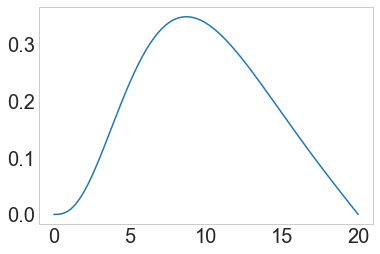

In [17]:
import scipy.integrate as SI
import scipy.optimize as SOP
import numpy as np
import matplotlib.pyplot as plt
xmax=20# higher higher excited states
#oe=-1 # set -1 for odd
X=np.linspace(1e-10,xmax,100)
PSI0=[0,1]
z=1
l=2

def f(PSI,x,l,z,e):# function for Schr eqn
    psi, psid=PSI
    dpsi=psid
    dpsid=((l*(l+1)/(x*x))-(2*z/x)+(2*e))*psi
    return [dpsi, dpsid]

def schr(e): # function for bisection
    P=SI.odeint(f,PSI0,X,args=(l,z,e))
    shy =P[-1,0] # 
    return(shy)

ecr=SOP.bisect(schr,0.05,0.06) # set app  limits

print ('eigenvalue is ', ecr)

X1=np.linspace(1e-10,xmax,500)
P=SI.odeint(f,PSI0, X1,args=(l,z,ecr))
si=P[:,0]
X=np.linspace(0,xmax,500)
N=1.0/SI.simps(si*si, X)
si*=np.sqrt(N)
#simin, simax=min(si), max(si)
plt.plot(X1,si)
plt.grid()
plt.show()

0.4 0.6
eigenvalue is  0.4964169481754652
1.5 2.3
eigenvalue is  1.9999971676166748
7.85 8
eigenvalue is  7.9999999087191105


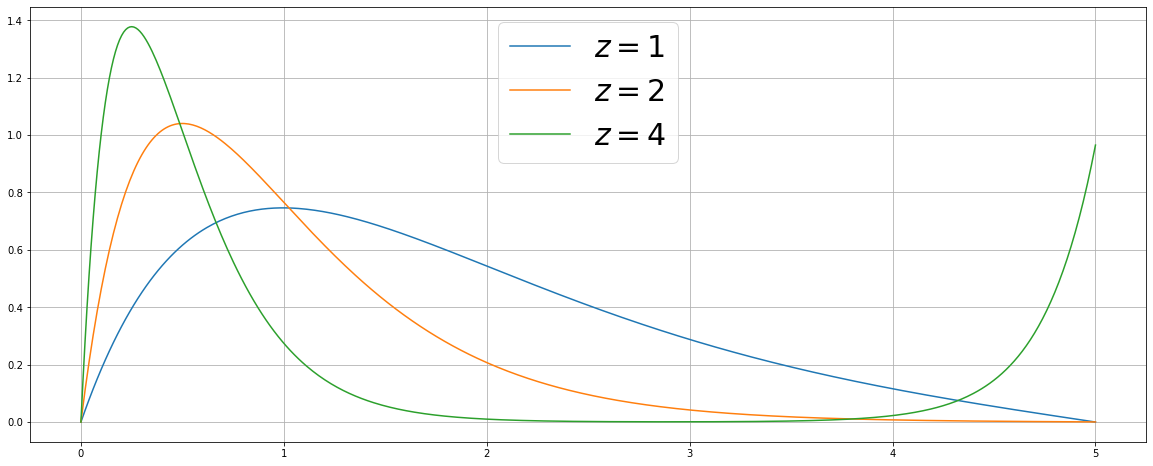

In [2]:
import scipy.integrate as SI
import scipy.optimize as SOP
import numpy as np
import matplotlib.pyplot as plt
xmax=5 # higher higher excited states
PSI0=[0,1]
Z=[1,2,4]
l=0
plt.figure(figsize=(20, 8))
a=[0.4,1.5,7.85]
b=[0.6,2.3,8]
for i in range(3):
    X=np.linspace(1e-10,xmax,100)
    n=0
    m=0
    def f(PSI,x,z,e):# function for Schr eqn
        psi, psid=PSI
        dpsi=psid
        dpsid=(0-(2*z/x)+(2*e))*psi
        return [dpsi, dpsid]
    def schr(e): # function for bisection
        P=SI.odeint(f,PSI0,X,args=(z,e))
        shy =P[-1,0] # 
        return(shy)
    z=Z[i]
    n=a[i]
    m=b[i]
    ecr=SOP.bisect(schr,n,m) # set app  limits
    print(n,m)
    print ('eigenvalue is ', ecr)
    X1=np.linspace(1e-10,xmax,500)
    P=SI.odeint(f,PSI0, X1,args=(z,ecr))
    si=P[:,0]
    X=np.linspace(0,xmax,500)
    N=1.0/SI.simps(si*si, X)
    si*=np.sqrt(N)
    plt.plot(X1,si)
    plt.legend(['$z=1$','$z=2$','$z=4$'],fontsize=30)
    plt.grid()
plt.show()

eigenvalue is  7.340264088836193


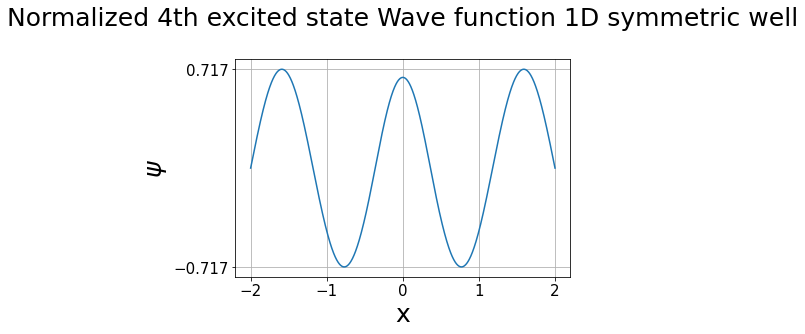

In [3]:
import scipy.integrate as SI
import scipy.optimize as SOP
import numpy as np
import matplotlib.pyplot as plt

xmax=2  # higher higher excited states
oe=1 # set -1 for odd state
X=np.linspace(0,xmax,100)
PSI0=[1,0]       # ass for 4th excited state psi=1 and dpsi=0 at x=0 ,Even

v=4
def f(PSI,x,v,e):# function for Schr eqn
    psi, psid=PSI
    dpsi=psid
    if -0.5<x<0.5:
        dpsid=-v*psi-2*e*psi
    else:
        dpsid=-2*e*psi
    return [dpsi, dpsid]

def schr(e): # function for bisection
    P=SI.odeint(f,PSI0,X,args=(v,e))
    shy =P[-1,0] # 
    #print(shy)
    return(shy)

ecr=SOP.bisect(schr,7.0,7.5) # set app  limits

print ('eigenvalue is ', ecr)
#e=np.linspace(1,200,1000)

X1=np.linspace(0,xmax,500)
P=SI.odeint(f,PSI0, X1,args=(v,ecr))
P2=oe*np.flipud(P)
PT=np.vstack((P2[:-1],P))
si=PT[:,0]
X=np.linspace(-xmax,xmax,999)
N=1.0/SI.simps(si*si, X)
si*=np.sqrt(N)
simin, simax=min(si), max(si)
plt.plot(X,si)
#plt.rcParams.update({'font.size':20})
plt.xlabel('x',size=25)
plt.grid()
plt.yticks([simin,simax],size=15)
plt.xticks(size=15)
plt.ylabel(r'$\psi$',fontsize=25)
plt.title("Normalized 4th excited state Wave function 1D symmetric well\n",size=25)
plt.show()

B) Analytical approach to this problem gives rise to transcendental equations. Solve the
theoretical transcendental equations to find the energy eigenvalues, energy eigenvectors
and compare them with those from the problem A) part.